<a href="https://colab.research.google.com/github/hardiksraja/DataScience_Learning/blob/master/Stats_ML_Linkage/Imputing_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/hardiksraja/DataScience_Learning/master/Stats_ML_Linkage/datasets/churn_data_st.csv')

In [0]:
churn_df=churn_master_df.copy()

* There multiple ways to impute missing values. A mean median mode can be applied to it.
* Checking what is the distribution of data and using right method to impute missing data.
* Can correlation be used within the data to impute the target value.

In [5]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


### Independent Variable
1. Tenure: how long the cusomter has been with the company (in months)
2. ServiceCount : Number of services/ product customer has availed
3. Contract : Contract term of the customer  -> monthly , yearly
4. Total charges : During the tenure of a particular lifetime, how much total charges have been made.
5. SeniorCitizen : Indicates 1 as SeniorCitizen and 0 otherwise

### Dependent Variable
1. Churn : Whether the customer will churn or not

Others are self explanatory

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [7]:
churn_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [8]:
churn_df.isna()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False


In [9]:
print ( "Rows : " , churn_df.shape[0] )
print ( "Columns : " ,churn_df.shape[1] )
print ( "\n Features : \n " , churn_df.columns.tolist())
print ( "\n Missing values : \n" , churn_df.isnull().any())
print ( "\n Unique values : \n" , churn_df.nunique())


Rows :  7043
Columns :  10

 Features : 
  ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

 Missing values : 
 customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

 Unique values : 
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


In [10]:
churn_df[churn_df.isna().any(axis=1)] # all rows (as axis=1) that have null values 

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No


* Churn column for all missing rows is no. Monthly charges and tenure should have some correlation with total charges.
* for many records tenure is 0, these rows can have total charges column as null

In [11]:
churn_df[churn_df['tenure']==0] # dataframe where tenure is 0

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In above the monthly charges are present but total charges are null.
* We can either copy the monthly charges to the total charges or we can put zero in total charges 
* It depends on the model that we are going to use. 
* if its XGboost model or gradient boosting model, it supports null values.. Then we can impute it to a very high value.
* If a model is very adoptive to outliers, we cannot substitue high values. We need to substitute a value which is inline with it.

--> There are two categories one where tenure is zero and other where tenure is not zero

In [12]:
churn_df['TotalCharges'].describe()

count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

* Here we see, there is a lot of variation in TotalCharges and hence we cannot impute with mean or median for null values as we saw customers have differnet tenure.
* Our target here (as per the records with null value) is to impute for all customer with churn as 'No'. Here, We are going to focus on the category - 'no'

In [13]:
churn_df[churn_df['Churn']=='No'].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


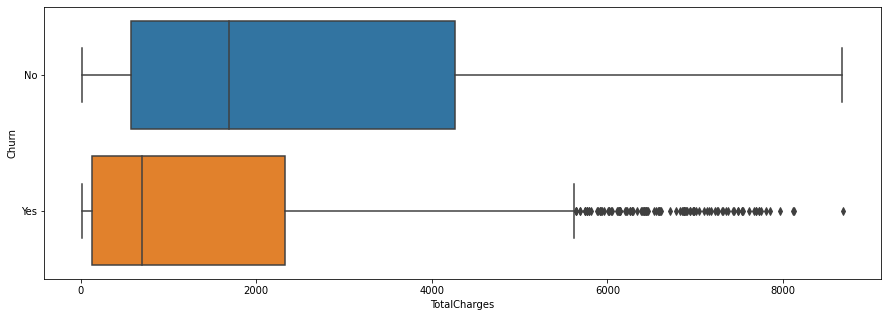

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(x="TotalCharges", y="Churn", data=churn_df)

* Churn 'No' does not have much outliers but all outliers are present for Churn 'Yes' Type
* The distribution does not look normal.


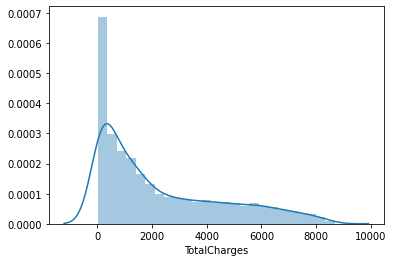

In [15]:
sns.distplot(churn_df['TotalCharges'], hist = True)

* It is not gaussian and it is right skewed.
* WE can either use total charges directly for models which are immune to the distribution.
* Here we can apply power function (In below, squareroot which is power of 1/2) or exponential function to get a somewat normal distrbution.


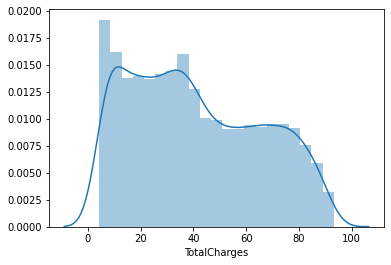

In [16]:
sns.distplot(churn_df['TotalCharges'].apply(np.sqrt), hist = True)

Distribution is a bit better now. We are not altering the data. The data is still as it is. We have just changed the representation.

-> lmplot is a convineint way of fitting the regression model 

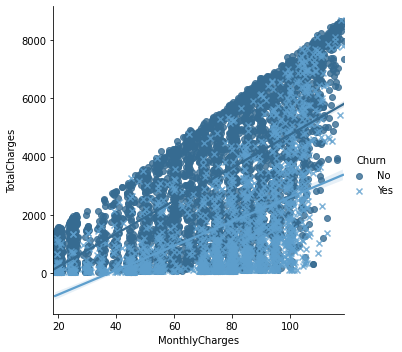

In [18]:
# there are two lines that are fitted for churn yes and no type 
sns.lmplot(x='MonthlyCharges' , y= 'TotalCharges', data= churn_df , fit_reg = True , hue = "Churn" , markers = ["o","x"], palette= "Blues_d")

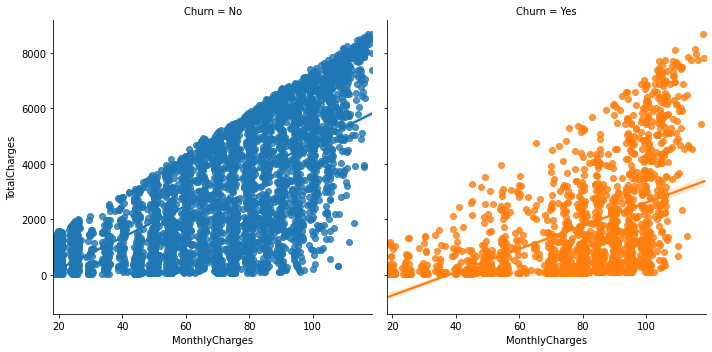

In [19]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=churn_df, fit_reg=True, hue="Churn", col="Churn")

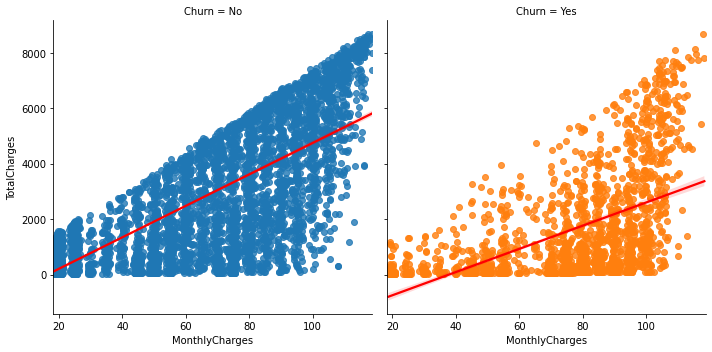

In [20]:
#divided the data into two columns of churn : two different scatter plots for churn . 
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=churn_df, fit_reg=True, hue="Churn", col="Churn", line_kws={'color':'red'})

No strong relationship as if we calculate SE it is going to be pretty high

In [21]:
churn_df[['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.650964
MonthlyCharges,0.650964,1.000000


In [22]:
churn_df[churn_df['Churn']=='No'][['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75739
MonthlyCharges,0.75739,1.00000


Correlation between Total charges and monthly charges for churn No is better.

In [23]:
churn_no_df=churn_df[(churn_df['Churn']=='No') & (churn_df['TotalCharges'].isna()==False)]
churn_no_df.shape[0]

5147

In [24]:
churn_no_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No


We have excluded null total charges and created a new dataframe
First we are going to use it to build a model using this new created dataframe and then we are going back to the null values and impute with the created model.

In [0]:
from scipy.stats import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['MonthlyCharges'],churn_no_df['TotalCharges'])

In [26]:
print ('Slope : ' , slope)
print ('Intercept : ' , intercept)
print ('R_value : ' , r_value) # co-orelation coeffiecient
print ('P_value : ' , p_value) # hypothesis test is 2 sided (two tailed test) P value test - > variable is signifcant (check importance of variable)
print ('Std_err : ' , std_err) # error of the estimated gradient (Because we see the regression line does not fit all the points in space and hence the total error)
print ('R_squared : ' , r_value **2) # proportion of the variance in the dependent variable that is explained by the independent variable

Slope :  56.73637552696062
Intercept :  -922.8160085118097
R_value :  0.7573902887184033
P_value :  0.0
Std_err :  0.6819261867835148
R_squared :  0.5736400494449463


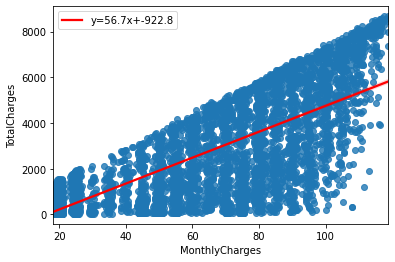

In [27]:
ax = sns.regplot(x='MonthlyCharges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

Here the points are not on line or close to it so the std err is pretty high . Now we will check if there is any other variable which has better scope of prediction. Cover more variance and less std error

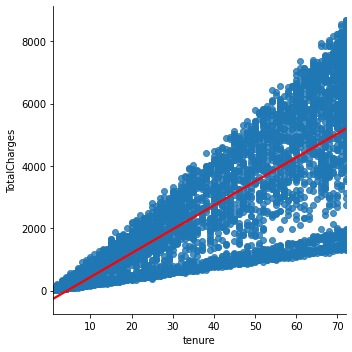

In [28]:
sns.lmplot(x='tenure', y='TotalCharges', data=churn_no_df, fit_reg=True, line_kws={'color':'red'})

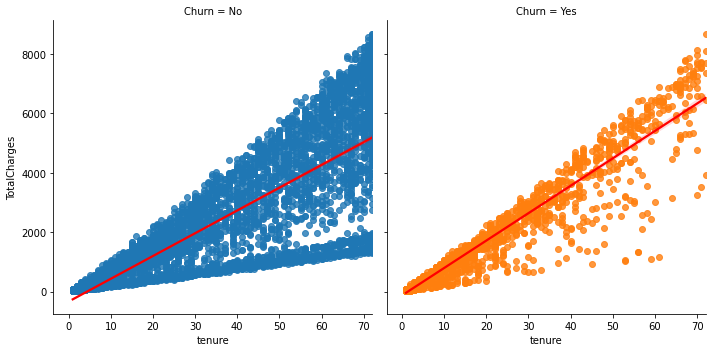

In [29]:
sns.lmplot(x='tenure' , y= 'TotalCharges', data= churn_df , fit_reg = True ,col="Churn", hue = "Churn" , line_kws= {'color':'red'})

In [30]:
churn_df[['tenure','TotalCharges']].corr() # better than the monthly charges

,tenure,TotalCharges
tenure,1.000000,0.826066
TotalCharges,0.826066,1.000000


In [31]:
churn_df[churn_df['Churn']=='No'][['TotalCharges','tenure']].corr() # better than the monthly charges

,TotalCharges,tenure
TotalCharges,1.000000,0.793288
tenure,0.793288,1.000000


In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['tenure'],churn_no_df['TotalCharges'])

In [33]:
print ('Slope : ' , slope)
print ('Intercept : ' , intercept)
print ('R_value : ' , r_value)
print ('P_value : ' , p_value) # two tailed test - > variable is signifcant
print ('Std_err : ' , std_err) # error of the estomated gradient
print ('R_squared : ' , r_value **2) # proportion of the variance in the dependent variable that is predcited by the independent variable

Slope :  76.74259761920021
Intercept :  -334.08560506046933
R_value :  0.793287728023258
P_value :  0.0
Std_err :  0.8211475250987232
R_squared :  0.6293054194323026


R_squared has imporved but the std_err has also increased.

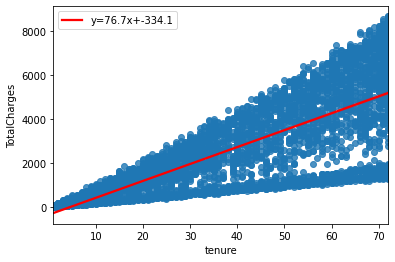

In [34]:
ax=sns.regplot(x='tenure', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

Total charges is a combination of tenure and monthly charges. create a new feature with these two columns.

In [36]:
# churn_no_df['tenure_charges'] = churn_no_df['tenure']*churn_no_df['MonthlyCharges']

churn_no_df['tenure_charges'] = churn_no_df['tenure']*churn_no_df['MonthlyCharges']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
churn_no_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


In [38]:
churn_no_df[churn_df['Churn']=='No'][['TotalCharges','tenure_charges']].corr() # Correaltion is closed to 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,TotalCharges,tenure_charges
TotalCharges,1.000000,0.999535
tenure_charges,0.999535,1.000000


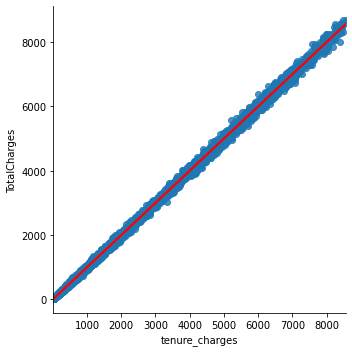

In [39]:
sns.lmplot(x='tenure_charges', y ='TotalCharges', data=churn_no_df, fit_reg=True, line_kws={'color':'red'})

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df['tenure_charges'],churn_no_df['TotalCharges'])

In [41]:
print ('Slope : ' , slope)
print ('Intercept : ' , intercept)
print ('R_value : ' , r_value)
print ('P_value : ' , p_value) # two tailed test - > variable is signifcant
print ('Std_err : ' , std_err) # error of the estomated gradient
print ('R_squared : ' , r_value **2) # proportion of the variance in the dependent variable that is predcited by the independent variable

Slope :  1.0001720821518205
Intercept :  -0.3010983695039613
R_value :  0.9995350350972924
P_value :  0.0
Std_err :  0.00042536192429779864
R_squared :  0.9990702863869455


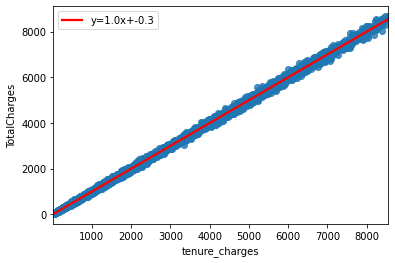

In [42]:
ax=sns.regplot(x='tenure_charges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

In [0]:
  def fill_na(tenure, monthlycharges):
    if tenure == 0:
      totcharges=monthlycharges
    else:
      totcharges=tenure*monthlycharges
      totcharges=intercept+(totcharges*slope)
    return round(totcharges,2)

In [0]:
churn_df['TotChargeNew'] = churn_df.apply(lambda x: x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fill_na(x['tenure'],x['MonthlyCharges']),axis=1)

In [64]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4694.91
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.03
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.25
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5981.53
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,356.96


In [0]:
churn_actual_df = pd.read_csv('https://raw.githubusercontent.com/hardiksraja/DataScience_Learning/master/Stats_ML_Linkage/datasets/churn_data_actual.csv')

In [0]:
churn_merged = pd.merge(churn_df, churn_actual_df)

In [67]:
churn_merged[churn_merged.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew,TotChargesAct
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4694.91,4784.45
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55,
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25,
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85,
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75,
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.03,194.55
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.25,3242.5
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05,
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5981.53,5914.4
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,356.96,279.2
